In [1]:
#linear Regression
import pandas as pd



In [2]:
import seaborn as sns

In [3]:
import matplotlib.pyplot as plt

In [4]:
import scipy.stats as stats

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
from sklearn.linear_model import LinearRegression

In [7]:
#To see all the dataset available in seaborn
sns.get_dataset_names()
#To extract the data we use  = smp.load_dataset("")


['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic',
 'anagrams',
 'anagrams',
 'anscombe',
 'anscombe',
 'attention',
 'attention',
 'brain_networks',
 'brain_networks',
 'car_crashes',
 'car_crashes',
 'diamonds',
 'diamonds',
 'dots',
 'dots',
 'dowjones',
 'dowjones',
 'exercise',
 'exercise',
 'flights',
 'flights',
 'fmri',
 'fmri',
 'geyser',
 'geyser',
 'glue',
 'glue',
 'healthexp',
 'healthexp',
 'iris',
 'iris',
 'mpg',
 'mpg',
 'penguins',
 'penguins',
 'planets',
 'planets',
 'seaice',
 'seaice',
 'taxis',
 'taxis',
 'tips',
 'tips',
 'titanic',
 'titanic',
 'anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'plan

In [8]:
taxis1 =sns.load_dataset("taxis")
taxis1

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6428,2019-03-31 09:51:53,2019-03-31 09:55:27,1,0.75,4.5,1.06,0.0,6.36,green,credit card,East Harlem North,Central Harlem North,Manhattan,Manhattan
6429,2019-03-31 17:38:00,2019-03-31 18:34:23,1,18.74,58.0,0.00,0.0,58.80,green,credit card,Jamaica,East Concourse/Concourse Village,Queens,Bronx
6430,2019-03-23 22:55:18,2019-03-23 23:14:25,1,4.14,16.0,0.00,0.0,17.30,green,cash,Crown Heights North,Bushwick North,Brooklyn,Brooklyn
6431,2019-03-04 10:09:25,2019-03-04 10:14:29,1,1.12,6.0,0.00,0.0,6.80,green,credit card,East New York,East Flatbush/Remsen Village,Brooklyn,Brooklyn


In [9]:
taxis=taxis1.head(2000)
taxis

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,2019-03-28 12:55:08,2019-03-28 12:59:42,1,0.56,5.0,4.00,0.0,12.30,yellow,credit card,Greenwich Village North,West Village,Manhattan,Manhattan
1996,2019-03-19 22:40:23,2019-03-19 22:47:49,1,0.97,6.5,2.06,0.0,12.36,yellow,credit card,Battery Park City,Seaport,Manhattan,Manhattan
1997,2019-03-30 23:10:19,2019-03-30 23:13:55,0,1.20,5.5,0.00,0.0,9.30,yellow,cash,Yorkville East,East Harlem North,Manhattan,Manhattan
1998,2019-03-04 13:59:55,2019-03-04 14:08:23,3,1.60,8.5,0.00,0.0,9.30,yellow,cash,East Concourse/Concourse Village,West Concourse,Bronx,Bronx


In [10]:
taxis.shape

(2000, 14)

<Axes: >

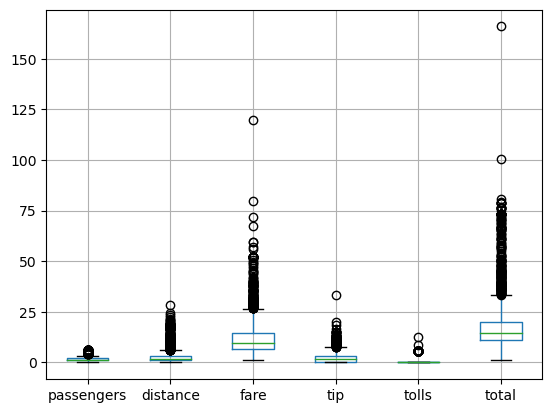

In [11]:
taxis.boxplot()

In [12]:
import numpy as np

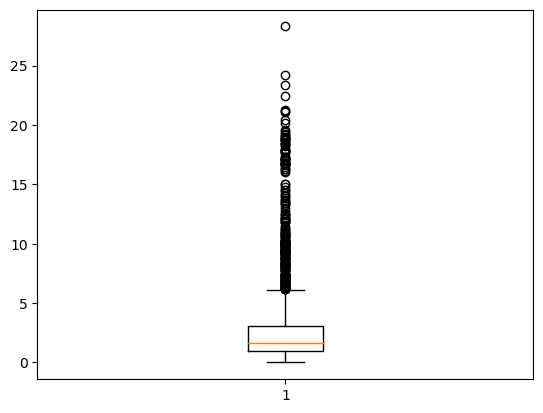

In [13]:
plt.boxplot(taxis.distance)
plt.show()

In [14]:
#Calculate z-scores for 'distance' and 'total' columns
taxis['z_score_distance'] = np.abs(stats.zscore(taxis['distance']))
taxis['z_score_total'] = np.abs(stats.zscore(taxis['total']))

# Define the z-score threshold
z_score_threshold = 1.5

# Filter out the outliers in both 'distance' and 'total' columns
filtered_taxis = taxis[(taxis['z_score_distance'] <= z_score_threshold) & (taxis['z_score_total'] <= z_score_threshold)]

# Drop the z-score columns
filtered_taxis = filtered_taxis.drop(columns=['z_score_distance', 'z_score_total'])

# Review the cleaned DataFrame
filtered_taxis

C:\Users\visit\AppData\Local\Temp\ipykernel_27176\3937263930.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  taxis['z_score_distance'] = np.abs(stats.zscore(taxis['distance']))
C:\Users\visit\AppData\Local\Temp\ipykernel_27176\3937263930.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  taxis['z_score_total'] = np.abs(stats.zscore(taxis['total']))


,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,2019-03-28 12:55:08,2019-03-28 12:59:42,1,0.56,5.0,4.00,0.0,12.30,yellow,credit card,Greenwich Village North,West Village,Manhattan,Manhattan
1996,2019-03-19 22:40:23,2019-03-19 22:47:49,1,0.97,6.5,2.06,0.0,12.36,yellow,credit card,Battery Park City,Seaport,Manhattan,Manhattan
1997,2019-03-30 23:10:19,2019-03-30 23:13:55,0,1.20,5.5,0.00,0.0,9.30,yellow,cash,Yorkville East,East Harlem North,Manhattan,Manhattan
1998,2019-03-04 13:59:55,2019-03-04 14:08:23,3,1.60,8.5,0.00,0.0,9.30,yellow,cash,East Concourse/Concourse Village,West Concourse,Bronx,Bronx


In [15]:
taxis

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough,z_score_distance,z_score_total
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan,0.357446,0.427304
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan,0.583250,0.702567
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan,0.421563,0.336052
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan,1.343052,1.382644
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan,0.201335,0.393367
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,2019-03-28 12:55:08,2019-03-28 12:59:42,1,0.56,5.0,4.00,0.0,12.30,yellow,credit card,Greenwich Village North,West Village,Manhattan,Manhattan,0.647367,0.476323
1996,2019-03-19 22:40:23,2019-03-19 22:47:49,1,0.97,6.5,2.06,0.0,12.36,yellow,credit card,Battery Park City,Seaport,Manhattan,Manhattan,0.533071,0.471798
1997,2019-03-30 23:10:19,2019-03-30 23:13:55,0,1.20,5.5,0.00,0.0,9.30,yellow,cash,Yorkville East,East Harlem North,Manhattan,Manhattan,0.468954,0.702567
1998,2019-03-04 13:59:55,2019-03-04 14:08:23,3,1.60,8.5,0.00,0.0,9.30,yellow,cash,East Concourse/Concourse Village,West Concourse,Bronx,Bronx,0.357446,0.702567


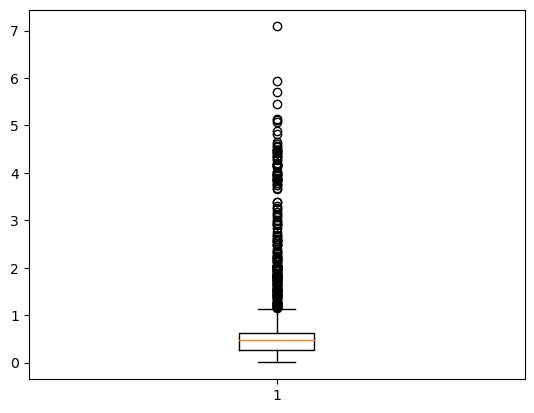

In [16]:
plt.boxplot (taxis.z_score_distance)
plt.show()

In [17]:
#extract the value 
X = taxis['total'].values
Y = taxis['distance'].values

In [18]:
X

array([12.95,  9.3 , 14.16, ...,  9.3 ,  9.3 , 13.39])

In [19]:
Y

array([1.6 , 0.79, 1.37, ..., 1.2 , 1.6 , 0.95])

In [20]:
#Shaped because is 1D
X = X.reshape(-1, 1)

In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size= 0.2)

In [22]:
reglin = LinearRegression()

In [23]:
reglin.fit(X_train,Y_train)

LinearRegression()

In [24]:
Y_pred = reglin.predict(X_test)


In [25]:
Y_pred2 = reglin.predict(X_train)

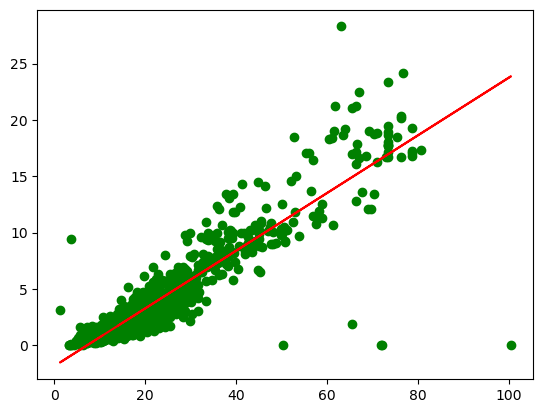

In [26]:
plt.scatter(X_train, Y_train, color="green")
plt.plot(X_train, Y_pred2, color="red")
plt.show()

In [27]:
#Multiple Linear Regression
#It is very similar to simple linear regression, in that , this time around we will be dealing
#with multiple independent variables instead of one like in the simple linear. 


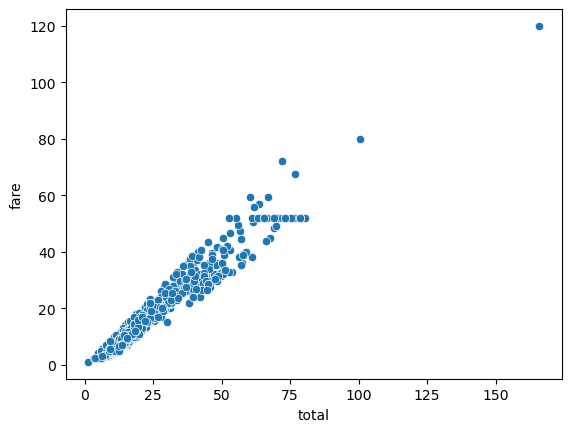

In [28]:
#for confirmation
sns.scatterplot(data=taxis, y="fare", x="total")
plt.show()

In [29]:
#converting from dataframe to non py array
X = taxis[['distance', 'fare']].values
Y = taxis['total'].values



In [30]:
from sklearn.model_selection import train_test_split 
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size= 0.2)



In [31]:
reglin = LinearRegression()

In [32]:
reglin.fit(X_train,Y_train)

LinearRegression()

In [33]:
Y_pred_m = reglin.predict(X_test)

In [34]:
Y_pred2_m = reglin.predict(X_train)

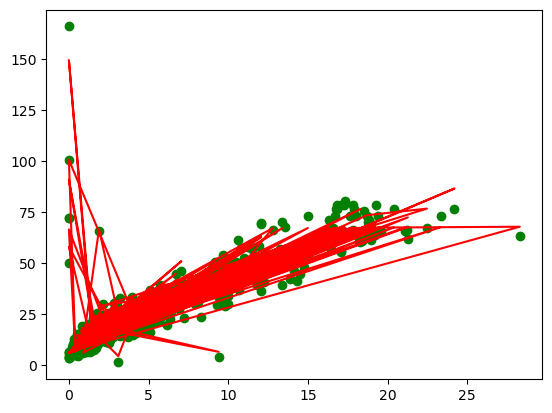

In [35]:
#1st variable
import matplotlib.pyplot as plt
plt.scatter(X_train[:,0], Y_train, color="green")
plt.plot(X_train[:,0], Y_pred2_m, color="red")
plt.show()

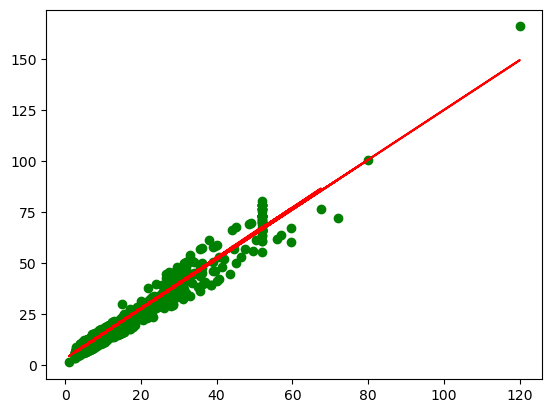

In [36]:
#2nd variable
plt.scatter(X_train[:,1], Y_train, color="green")
plt.plot(X_train[:,1], Y_pred2_m, color="red")
plt.show()